# Analysis of the World's Energy Production and Consumption


## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## Introduction

This analysis used [Gapminder's databases](https://www.gapminder.org/data/) on production and consumption of energy sources for several countries in the world. 

A total of twelve (12) tables were downloaded from this website and concatenated into one dataframe for an exploratory analysis of the evolution of the production and consumption of energy sources in the world.

While all of the tables comprised time-series data related to different variables, ten (10) of these tables were related to the production or consumption of energy sources, ranging mainly from 1971 to 2016 (range that had the least number of missing values for all the countries), and two (2) of these tables were related to economic growth (PPP$ GDP) and to Carbon Dioxide (CO2) emissions (1000 metric tonnes).

List of variables present in the dataframe and its description -- information retrieved from the [Gapminder's website](https://www.gapminder.org/data/):

1. Energy Production: Refers to forms of primary energy -- petroleum (crude oil, natural gas liquids, and oil from nonconventional sources), natural gas, solid fuels (coal, lignite, and other derived fuels), and combustile renewables and waste -- and primary electricity, all converted into tonnes of oil equivalents, counted in tonnes of oil equivalent (toe).

2. Coal Consumption: Total amount of coal consumption, counted in tonnes of oil equivalent (toe).

3. Electricity Generation: Electricity generation (killowatt-hours).

4. Electricity Residential Use: The total amount of residential electricity consumed during the given year, counted in killowatt-hours (kWh).

5. Natural Gas Production: Natural gas production, counted in tonnes of oil equivalent (toe).

6. Natural Gas Proven Reserves: Proven reserves of natural gas, counted in tonnes of oil equivalent (toe).

7. Nuclear Power Generation: The amount of electricity produced by nuclear power plants in a given year, counted in tonnes of oil equivalent (toe).

8. Oil Consumption: Total amount of crude oil consumption, counted in tonnes of oil equivalent (toe).

9. Oil Production: Total amount of crude oil production, counted in tonnes of oil equivalent (toe).

10. Oil Proven Reserves: Proven reserves of oil, counted in tonnes of oil equivalent (toe).

11. Gdp Ppp Inflation Adjusted: PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates.

12. Yearly Co2 Emissions 1000 Tonnes: Total carbon dioxide emissions from the burning of fossil fuels during the given year (1000 metric tonnes of CO2).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set the options of pandas to avoid the default limitation on diplaying large amounts of data
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 500)

<a id='wrangling'></a>
## Data Wrangling

<ul>
<li><a href="#importing">Importing the data</a></li>
The databases found in the Gapminder website are in .csv format, what facilitates the importing of the dataframes through pandas.   
However, the databases are not aggregated in a unique .csv file, but instead are distributed in various .csv files, each one for one time-series data related to a variable, and I had to manually download each of the 12 .csv files and import them individually to this notebook to later concatenate them.
<br><li><a href="#cleaning">Cleaning the data</a></li>
The missing values in the data are apparent. The missing data is mostly a symptom of concatenating a lot of different information together, as was done in this dataframe. However, some data simply was not gathered by my source (e.g. missing values for recent years) and some data simply does not exist (e.g. data for electricity in mid-18th century).
As for the data types, no transformation of data was needed.

</ul>

<a id='importing'></a>
### Importing the data


#### Importing the databases

In order to facilitate my work of importing all the files, I looped through a list that contained all the names of the files that I wanted to import. Then I imported each of them as pandas dataframes and adding an identifier to each, in a new column called `variable`. This functioned as a "tag" of each row, so the data of each database wouldn't get confused with that of other variables after concatenated.

In [3]:
# create a list with the names of the files
file_list = ! ls './energy-data'
# organize the list
file_list[0], file_list[3] = file_list[3], file_list[0]

In [4]:
# import all the databases to a list
dataframes = [pd.read_csv('energy-data/' + file) for file in file_list]

In [6]:
# add an identifier column representing each variable to the dataframe
for i, dataframe in enumerate(dataframes):
    identifier = file_list[i].replace('.csv', '').replace('_', ' ').title().strip(' Total')
    dataframe.insert(1, 'variable', identifier)
    print(i, identifier)

0 Energy Production
1 Electricity Generation
2 Electricity Residential Use
3 Coal Consumption
4 Natural Gas Production
5 Natural Gas Proved Reserves
6 Nuclear Power Generation
7 Oil Consumption
8 Oil Production
9 Oil Proved Reserves
10 Gdp Ppp Inflation Adjusted
11 Yearly Co2 Emissions 1000 Tonnes


In [7]:
df = pd.concat(dataframes, sort=True)

#### Checking the concatenation

We need to verify if the concatenation was successful. 

A way to do this is by comparing the `shape` of the resultant dataframe with the total number of rows of the concatenated dataframes and with number of columns with the total number of distinct columns of the concatenated dataframes.  

If the result is `True`, we can regard the concatenation as successful.

In [8]:
rows = 0
columns = set()

# get variables the number of total rows and the number of distinct columns
for d in dataframes:
    for column in d.columns:
        columns.add(column)
    rows += d.shape[0]

# compare the shape of the dataframe with the values obtained above
df.shape == (rows, len(columns))

True

#### Organizing columns structure

A rearengement of the columns may help with the assessment of the quality and structure of the data and later manipulation of the data.

In this case, I'll simply set the indices of columns 'variable' and 'country' to `0` and `1`.

In [9]:
# create a list from the dataframe columns attribute and rearange it
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]

# set the columns to the dataframe
df = df[cols]

# check
df.columns

Index(['country', 'variable', '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], dtype='object', length=268)

<a id='cleaning'></a>
### Cleaning the data


#### Data types

Understanding the structure and data types (`dtypes`) and evaluating the necessity of conversions. Considering the table has 266 columns with numerical values that are `float64` type, there is no need for any conversion.

In [10]:
df.shape

(1176, 268)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 191
Columns: 268 entries, country to 2016
dtypes: float64(266), object(2)
memory usage: 2.4+ MB


In [12]:
df.iloc[:,:2].dtypes

country     object
variable    object
dtype: object

#### Null values

Visualyzing the situation of null values and evaluating the necessity of cleaning. 

Although the missing values should be noted -- as a the data has a wide range of number of `null` values for each `variable`, the `null` values should not be dropped nor filled with other values, since the `null` values comes from a practical limitation, basically the absence of such data.

In [13]:
pd.DataFrame([df.isnull().sum(), df.notna().sum()], index=['null', 'non-null'])

,country,variable,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
null,0,0,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,...,108,109,109,47,37,22,18,18,15,15,8,8,8,8,8,7,6,6,5,6,5,5,134,233,367,403,407,591,783,783
non-null,1176,1176,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1068,1067,1067,1129,1139,1154,1158,1158,1161,1161,1168,1168,1168,1168,1168,1169,1170,1170,1171,1170,1171,1171,1042,943,809,773,769,585,393,393


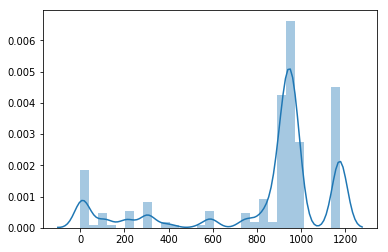

In [14]:
# distribution of null values
sns.distplot(df.isnull().sum().values);

#### Saving the dataframe to a new file

In [15]:
df.to_csv('energy-data-v5.csv', index=False)

<a id='eda'></a>
## Data Analysis

In [16]:
# import saved data
df = pd.read_csv('energy-data-v5.csv')

The available data allows for a comparison of different variables, countries and evolution of a variable over time. 

This study focused on __a.__ the comparison between countries in relation to a variable, and __b.__ the evolution of a variable over time, within a determined country -- for different variables -- or between countries -- for the same variable.

Project questions:
<ul>
    <li><b>Question 1. </b><a href='#1st'>How has the consumption and generation of different energy sources evolved over time in the world?</a></li><br>
    <li><b>Question 2. </b><a href='#2nd'> Which countries have produced and consumed the most Oil?</a> </li><br>
    <li><b>Question 3. </b><a href='#3rd'> How have the consumption and production of oil varied over time?</a> </li><br>
    <li><b>Question 4. </b><a href='#4th'> What country have emmited the highest amount of CO2 into the atmosphere and how have the emissions of CO2 varied over time?</a> </li> <br>
    <li><b>Question 5. </b><a href='#5th'> What is the relationship between Oil Consumption and GDP (PPP)?</a> </li>
</ul>

### Creating subsets of the dataframes for energy data

It is helpful to create subsets of the data to better manipulate when plotting the graphics.

#### Variables

In [17]:
for i, var in enumerate(df.variable.unique()):
    print(i+1,var)

1 Energy Production
2 Electricity Generation
3 Electricity Residential Use
4 Coal Consumption
5 Natural Gas Production
6 Natural Gas Proved Reserves
7 Nuclear Power Generation
8 Oil Consumption
9 Oil Production
10 Oil Proved Reserves
11 Gdp Ppp Inflation Adjusted
12 Yearly Co2 Emissions 1000 Tonnes


#### World data

In [18]:
# create a dataframe subset for displaying the world data
df_world = df.groupby('variable').sum()

#### Subsets for each variable
As the analysis focused somehow on the examination of each variable individually, it was also helpful to create the same subsets for all variables and store them in a dictionary -- although I recognize the limitation of this method, as certainly some aspects of some of the variables would be better analyzed in a different way (e.g. for `variable` Oil Proved Reserves, one cannot apply `.sum()` to obtain all-time amount of reserves found in a country).

For most variables, however, creating these standard subsets resulted in the facilitation the data manipulation, as demonstrated below.

In [19]:
subsets = {}

for variable in df.variable.unique():
    # create a subset for the whole available data for each variable
    df_variable = df.query(f'variable == "{variable}"')
    # create a subset for each variable grouped by country
    df_variable_country = df_variable.groupby('country').sum()
    # create a subset for the all-time summed value for each variable grouped by country and sorted
    df_variable_country_all_time = df_variable_country.sum(axis=1).sort_values(ascending=False)
    # create a subset for the evolution of each variable fot the top ten countries in all-time summed values
    df_variable_evolution = df_variable.loc[df_variable['country'].isin(df_variable_country_all_time[:10].index.values)].T
    df_variable_evolution.columns = df_variable_evolution.iloc[0]
    df_variable_evolution = df_variable_evolution.iloc[2:]
    
    subsets[variable] = [df_variable, df_variable_country, df_variable_country_all_time, df_variable_evolution]

##### Energy production

In [20]:
# top 10 all-time energy producing countries
subsets['Energy Production'][2][:10]

country
United States     76598000.0
China             37121000.0
Russia            21897000.0
Saudi Arabia      16764000.0
Canada            12693300.0
India             11308000.0
United Kingdom     9405000.0
Iran               8918200.0
Germany            7938000.0
Indonesia          7141600.0
dtype: float64

##### Oil production

In [21]:
# top 10 all-time oil producing countries
subsets['Oil Production'][2][:10]

country
United States           2.237100e+10
Saudi Arabia            2.030800e+10
Russia                  1.449500e+10
Iran                    9.459100e+09
Venezuela               7.559300e+09
China                   6.692700e+09
Mexico                  6.201500e+09
Canada                  5.789800e+09
Kuwait                  5.632620e+09
United Arab Emirates    5.185400e+09
dtype: float64

##### Oil consumption

In [22]:
# top 10 all-time oil consuming countries
subsets['Oil Consumption'][2][:10]

country
United States     4.147100e+10
Japan             1.165990e+10
China             9.937500e+09
Germany           6.679800e+09
Russia            5.293000e+09
France            4.784200e+09
Italy             4.454300e+09
Canada            4.390100e+09
United Kingdom    4.350200e+09
India             3.988900e+09
dtype: float64

##### Natural Gas production

In [23]:
# top 10 all-time natural gas producing countries
subsets['Natural Gas Production'][2][:10]

country
United States     2.394100e+10
Russia            1.596300e+10
Canada            4.918500e+09
Netherlands       2.689800e+09
Iran              2.504560e+09
United Kingdom    2.307120e+09
Algeria           2.210780e+09
Norway            1.973190e+09
Indonesia         1.971490e+09
Saudi Arabia      1.798530e+09
dtype: float64

##### Coal Consumption

In [24]:
# top 10 all-time coal consuming countries
subsets['Coal Consumption'][2][:10]

country
China             3.846300e+10
United States     2.290500e+10
India             7.314100e+09
Germany           5.921000e+09
Japan             4.226000e+09
Russia            3.964100e+09
Poland            3.747900e+09
South Africa      3.191800e+09
United Kingdom    3.034200e+09
Australia         1.889300e+09
dtype: float64

##### CO2 emissions

In [25]:
# top 10 all-time CO2 producing countries
subsets['Yearly Co2 Emissions 1000 Tonnes'][2][:10]

country
United States     3.759008e+08
China             1.747646e+08
Russia            1.086042e+08
Germany           8.608185e+07
United Kingdom    7.517542e+07
Japan             5.749072e+07
India             4.173646e+07
France            3.556040e+07
Canada            2.947611e+07
Ukraine           2.937778e+07
dtype: float64

##### Electricity generation

In [26]:
# top 10 all-time electricity generating countries
subsets['Electricity Generation'][2][:10]

country
United States     1.220900e+14
China             7.332100e+13
Japan             3.174800e+13
Russia            3.128200e+13
India             2.039900e+13
Germany           1.868000e+13
Canada            1.830300e+13
France            1.629500e+13
Brazil            1.167600e+13
United Kingdom    1.129500e+13
dtype: float64

##### Electricity consumption

In [27]:
# top 10 all-time electricity consuming countries (household)
subsets['Electricity Residential Use'][2][:10]

country
United States     3.877600e+13
Japan             7.332200e+12
Germany           4.906900e+12
Canada            4.567400e+12
United Kingdom    4.351900e+12
France            3.719070e+12
China             3.590590e+12
Russia            2.419000e+12
Italy             1.994270e+12
Brazil            1.823560e+12
dtype: float64

##### Nuclear Power Generation

In [28]:
# top 10 all-time countries that produced energy from nuclear sources
subsets['Nuclear Power Generation'][2][:10]

country
United States     1.907189e+09
France            9.476065e+08
Japan             6.579098e+08
Germany           4.108313e+08
Russia            2.398400e+08
United Kingdom    2.380610e+08
Canada            2.282406e+08
South Korea       2.182211e+08
Sweden            1.815645e+08
Ukraine           1.444100e+08
dtype: float64

<a id='1st'></a>
### Question 1. How has the consumption and generation of different energy sources evolved over time in the world?

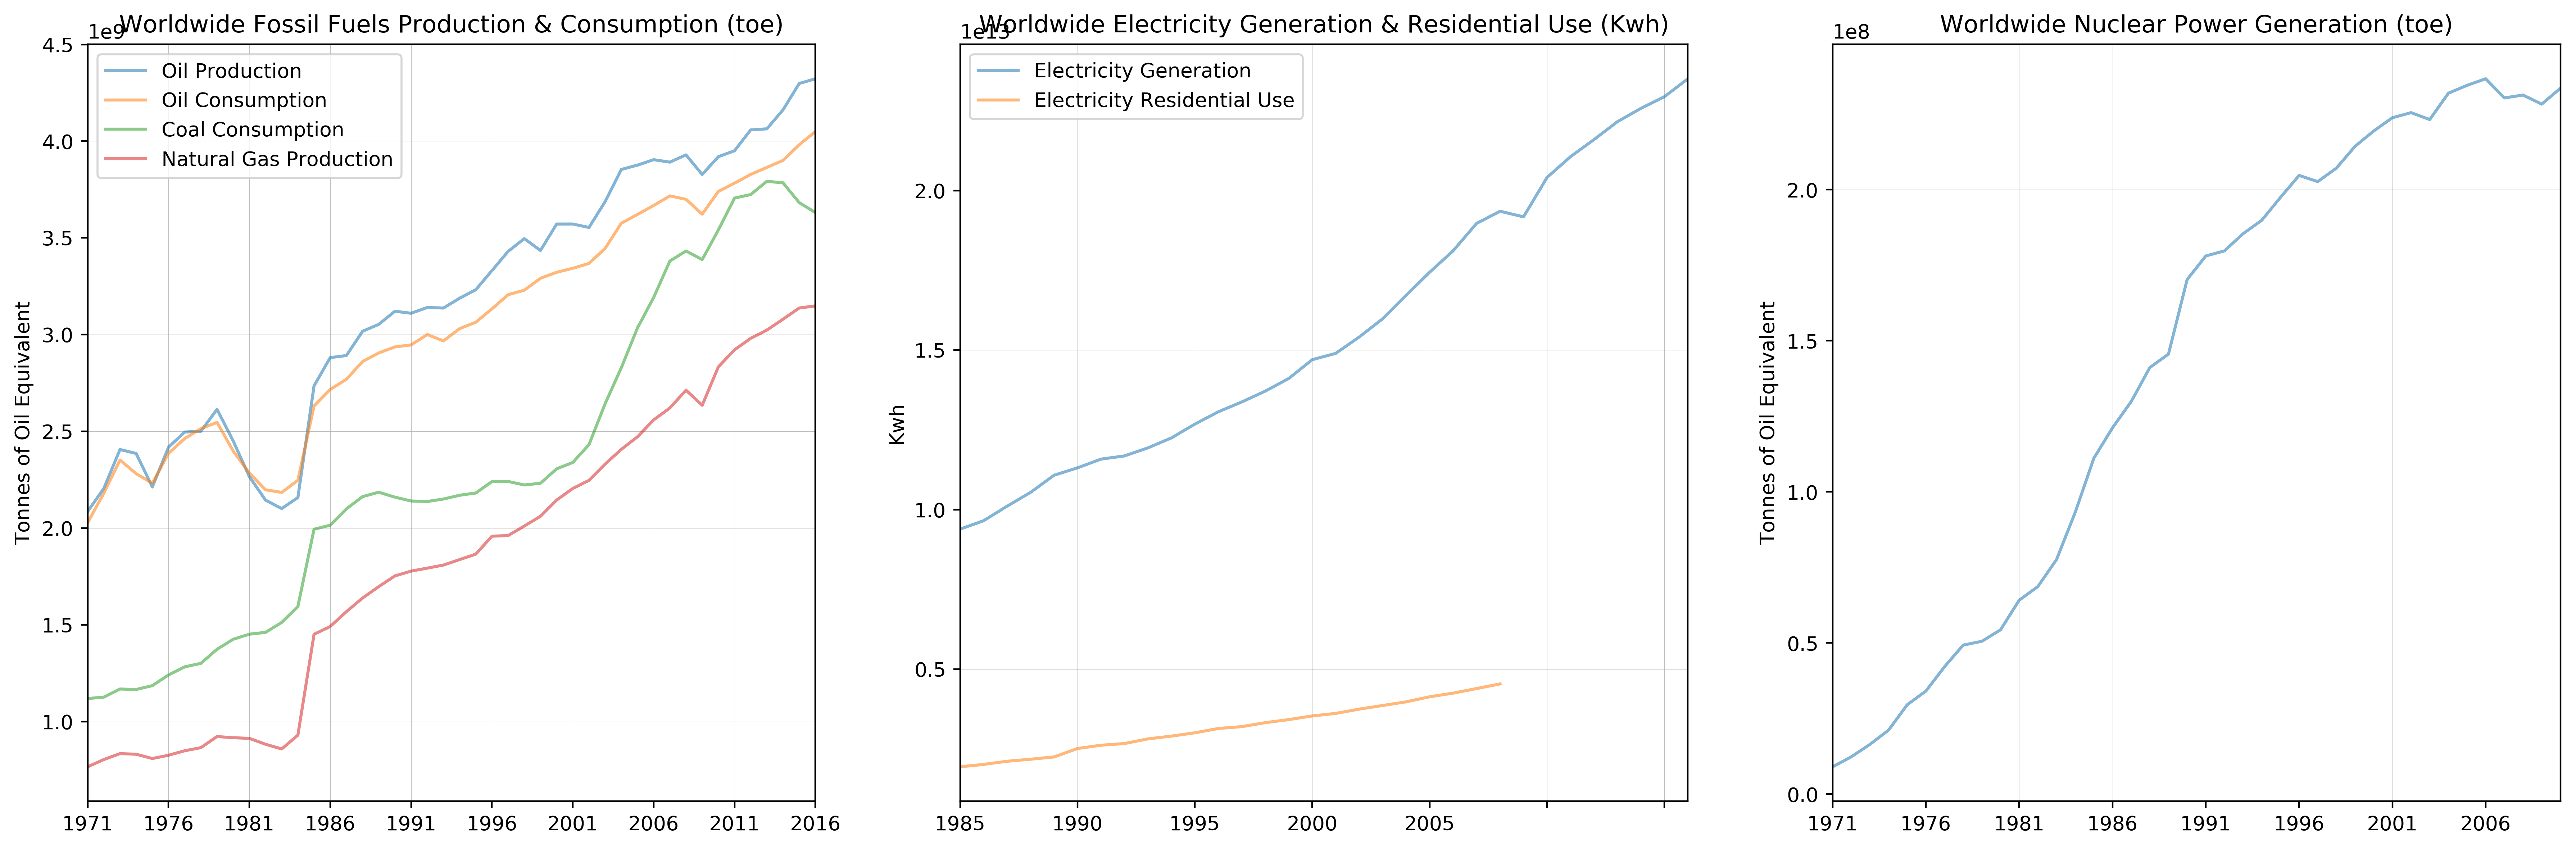

In [29]:
fig = plt.figure(figsize=(18,6), dpi=400)
alpha_bar_chart = 0.55

plt.subplot(1,3,1)
plt.title("Worldwide Fossil Fuels Production & Consumption (toe)")

df_world.loc['Oil Production','1971':].plot(alpha=alpha_bar_chart)
df_world.loc['Oil Consumption','1971':].plot(alpha=alpha_bar_chart)    
df_world.loc['Coal Consumption','1971':].plot(alpha=alpha_bar_chart)    
df_world.loc['Natural Gas Production','1971':].plot(alpha=alpha_bar_chart)    

plt.ylabel('Tonnes of Oil Equivalent')

plt.grid(True, linewidth=0.15)
plt.legend()

plt.subplot(1,3,2)
plt.title("Worldwide Electricity Generation & Residential Use (Kwh)")

df_world.loc['Electricity Generation','1985':].plot(alpha=alpha_bar_chart)    
df_world.loc['Electricity Residential Use','1985':'2008'].plot(alpha=alpha_bar_chart)    

plt.ylabel('Kwh')

plt.grid(True, linewidth=0.15)
plt.legend()

plt.subplot(1,3,3)
plt.title("Worldwide Nuclear Power Generation (toe)")

df_world.loc['Nuclear Power Generation','1971':'2010'].plot(alpha=alpha_bar_chart)

plt.ylabel('Tonnes of Oil Equivalent')

plt.grid(True, linewidth=0.15)

plt.tight_layout();

> __Conclusion__: There is a clear strong upward trend in the consumption and generation of energy sources in the world and there is no sign of desacceleration in energy sources consumption. This chart shows that among fossil fuels oil is clearly the most important, followed by Coal (since the production is higher than the consumption, as a natural rule, it is safe to affirm that the coal consumption is higher than the natural gas consumption). A slight decrease in consumption and production can be observed between 2006 and 2011, which may be an effect of the 2008 world economic crisis. A slight decrease in the consumption of Coal and a slight increase in the consumption and production of oil can be observed between 2011 and 2016.

<a id='2nd'></a>
### Question 2. Which countries have produced and consumed the most Oil? 

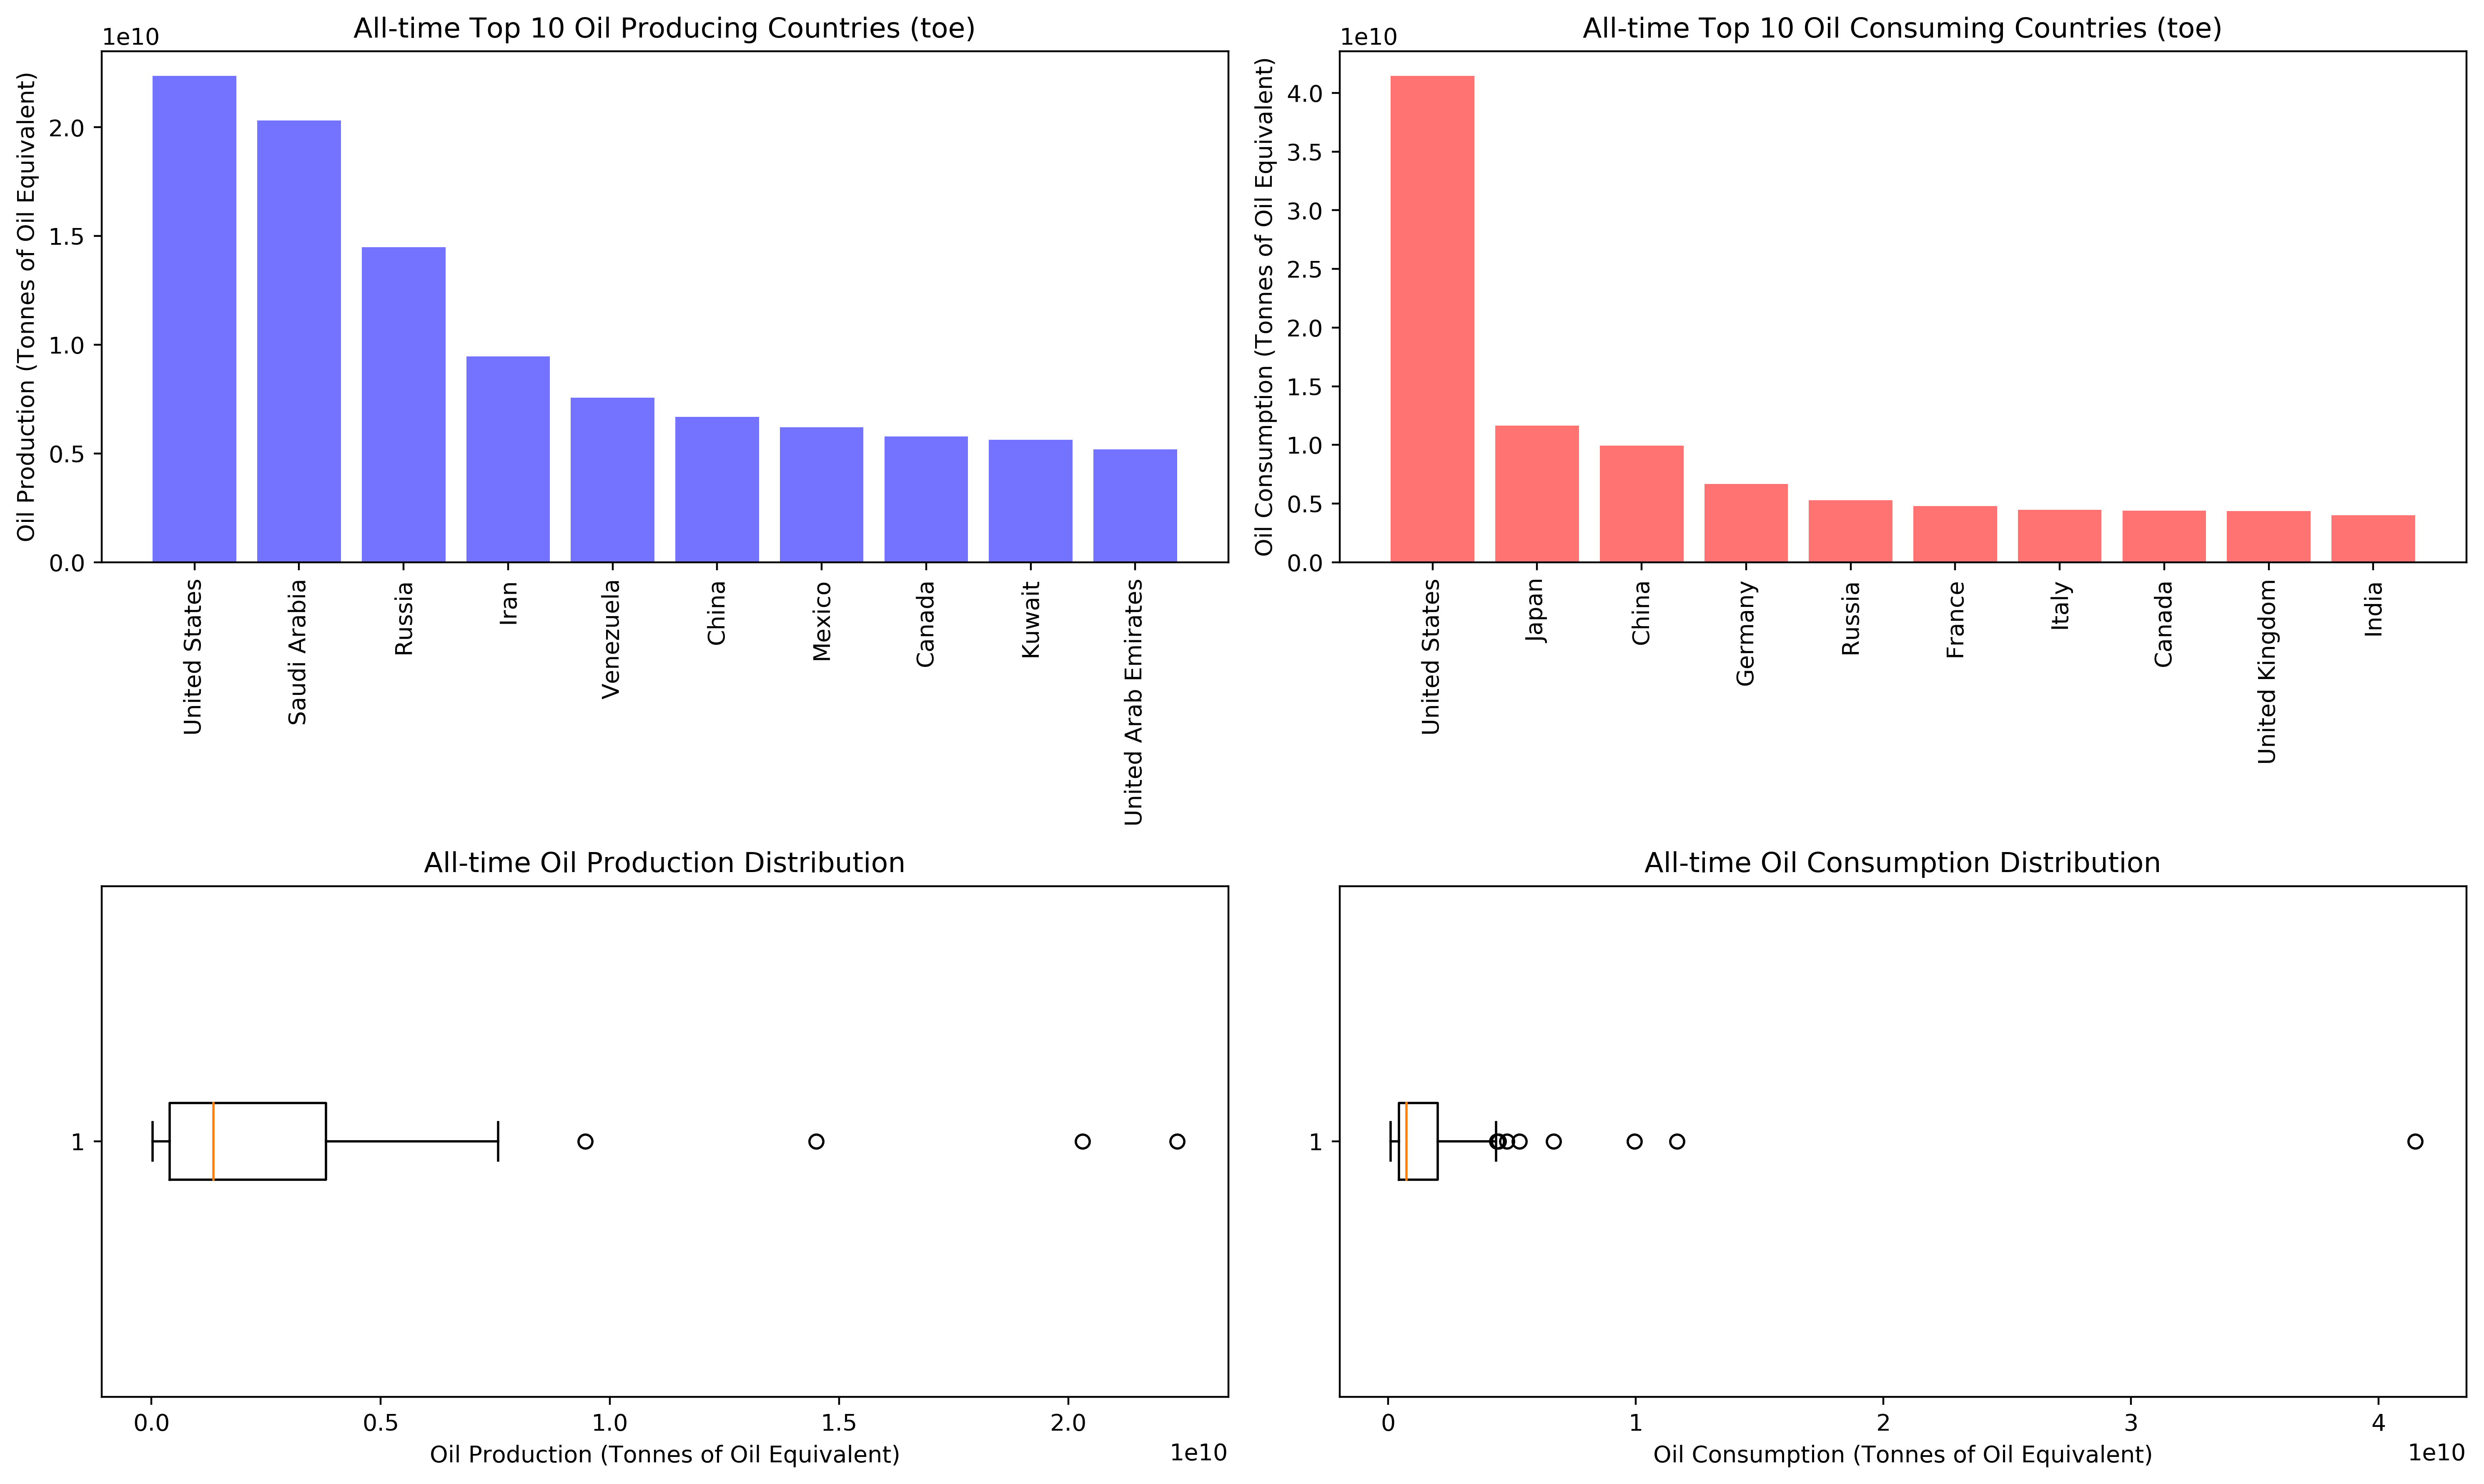

In [30]:
fig = plt.figure(figsize=(15,9), dpi=400)

# subplot of a bar chart for top 10 countries in oil production
plt.subplot(2,2,1)
plt.title('All-time Top 10 Oil Producing Countries (toe)')

x = subsets['Oil Production'][2][:10].index
y = subsets['Oil Production'][2][:10].values
plt.bar(x, y, alpha=0.55, color='b')
plt.xticks(rotation='vertical')
plt.ylabel('Oil Production (Tonnes of Oil Equivalent)')

# subplot of a bar chart for top 10 countries in oil consumption
plt.subplot(2,2,2)
plt.title('All-time Top 10 Oil Consuming Countries (toe)')

x = subsets['Oil Consumption'][2][:10].index
y = subsets['Oil Consumption'][2][:10].values
plt.bar(x, y, alpha=0.55, color='r')
plt.xticks(rotation='vertical')
plt.ylabel('Oil Consumption (Tonnes of Oil Equivalent)')

# subplot of a boxplot
plt.subplot(2,2,3)
plt.title('All-time Oil Production Distribution')
plt.boxplot(subsets['Oil Production'][2].values, positions=[1], 
            vert=False)
plt.xlabel('Oil Production (Tonnes of Oil Equivalent)')

# subplot of a boxplot
plt.subplot(2,2,4)
plt.title('All-time Oil Consumption Distribution')
plt.boxplot(subsets['Oil Consumption'][2].values, positions=[1], 
            vert=False)
plt.xlabel('Oil Consumption (Tonnes of Oil Equivalent)')

plt.tight_layout();

> __Conclusion__: The United States is by far the country that has consumed the highest amount of energy from various energy sources. It also appears almost 50% of the oil consumed by the US was imported over the years. Most of the all-time oil producing countries are not in the top ten all-time oil consuming countries (i.e. Saudi Arabia, Iran, Venezuela, Mexico, Kuwait and United Arab Emirates). The box and whiskers plots show that the distribution of both the production and the distribution are right skewed, meaning that a few countries (in this case they are considered outliers) are really apart from the rest when it comes to consumption and production of oil.

<a id='3rd'></a>
### Question 3. How have the consumption and production of oil varied over time?

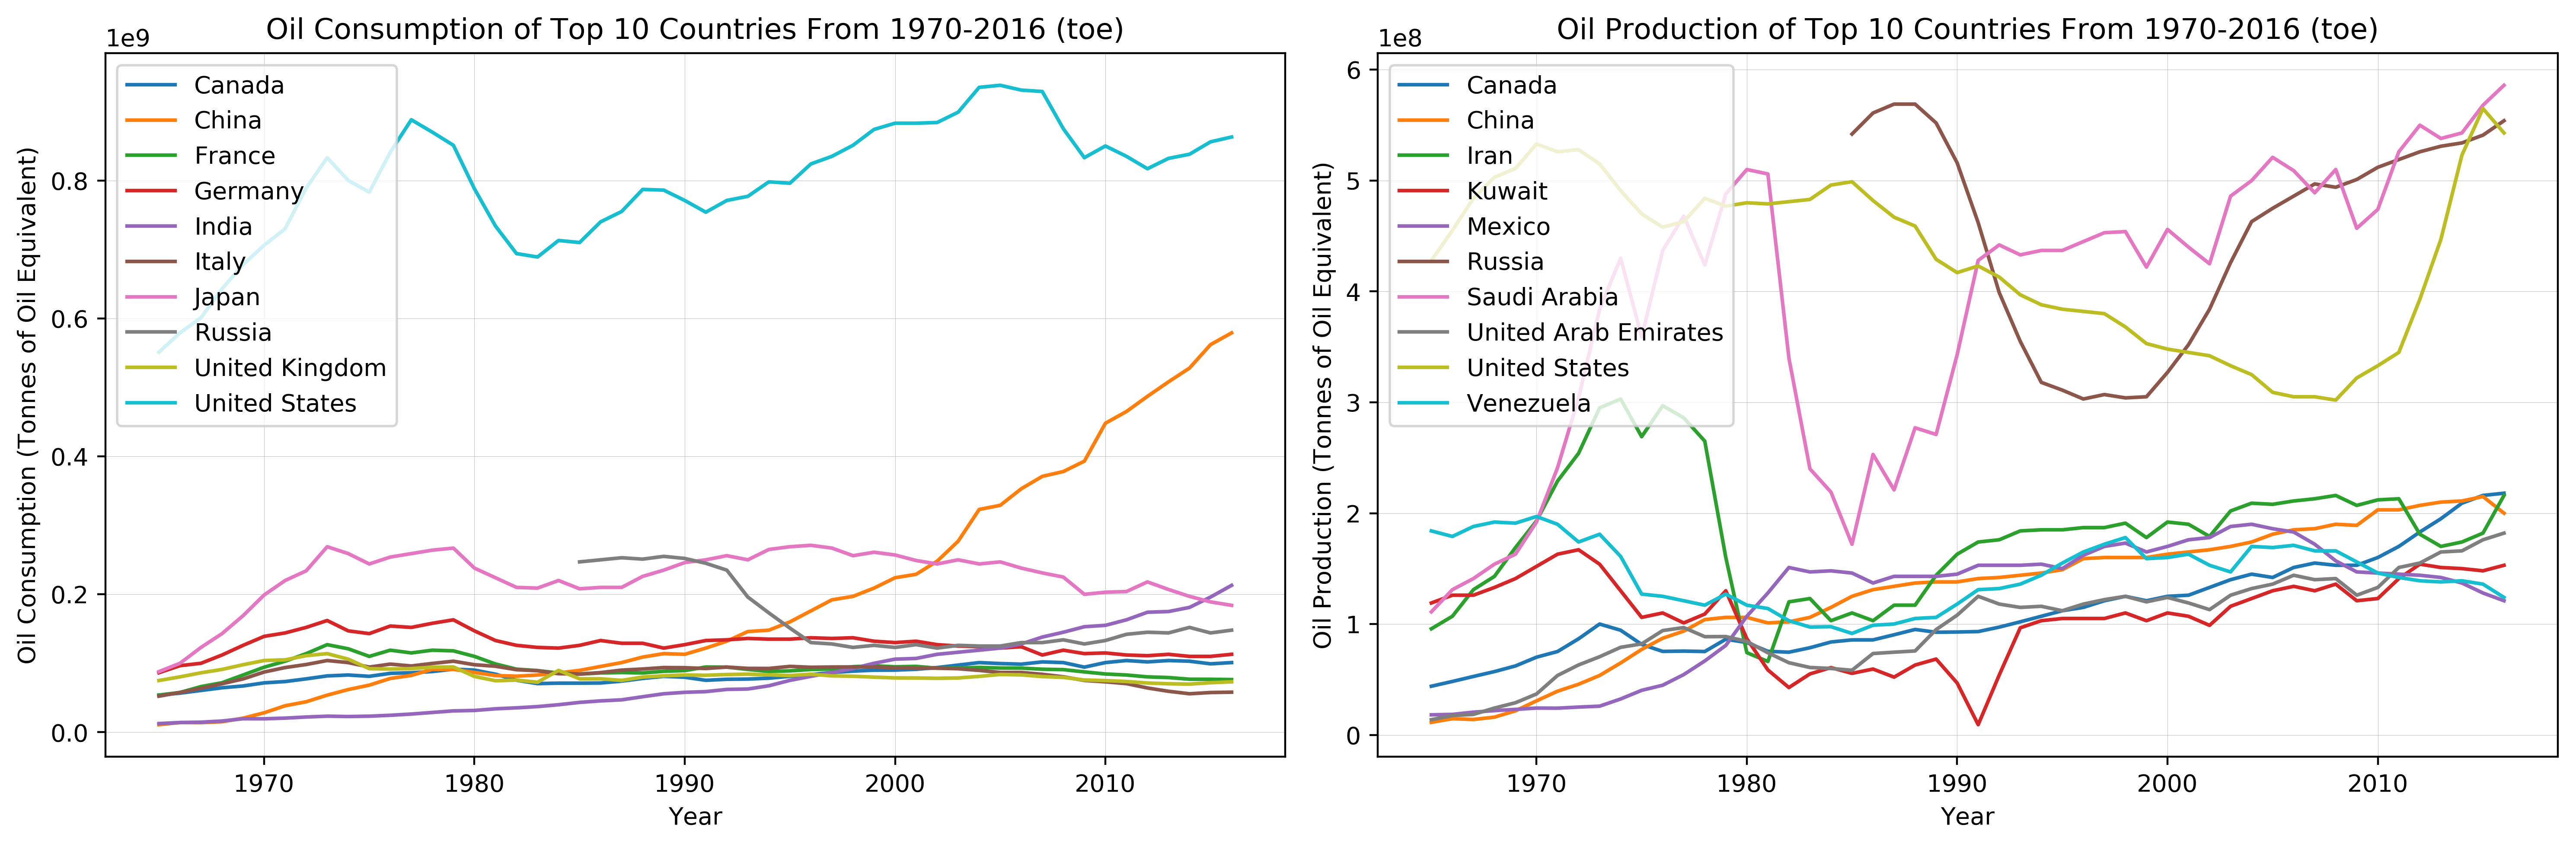

In [31]:
fig = plt.figure(figsize=(15,5), dpi=400)

# subplot of the evolution of oil consumption in the world for the top 10 countries

sub_1 = plt.subplot(1,2,1)
plt.title('Oil Consumption of Top 10 Countries From 1970-2016 (toe)')

x = subsets['Oil Consumption'][3].index.astype(int)
y = subsets['Oil Consumption'][3].values
legend_labels = subsets['Oil Consumption'][3].columns
plt.xlabel('Year')
plt.ylabel('Oil Consumption (Tonnes of Oil Equivalent)')

plt.plot(x, y)
plt.legend(legend_labels)
plt.grid(True, linewidth=0.15)

# subplot of the evolution of oil production in the world for the top 10 countries

plt.subplot(1,2,2)
plt.title('Oil Production of Top 10 Countries From 1970-2016 (toe)')

x = subsets['Oil Production'][3].index.astype(int)
y = subsets['Oil Production'][3].values
legend_labels = subsets['Oil Production'][3].columns
plt.xlabel('Year')
plt.ylabel('Oil Production (Tonnes of Oil Equivalent)')

plt.plot(x, y)
plt.legend(legend_labels)
plt.grid(True, linewidth=0.15)

plt.tight_layout();

> __Conclusion__: The United States stands out once again for its consumption and production of Oil, but mainly for its consumption, as it is, and has always been, a lot higher than that of other countries. The charts clearly show an upward accelerated trend of oil consumption of China and also an upward trend of oil consumption of India. The United States has been consistely increasing its Oil production from a little before 2010 until the last tracked year. Saudi Arabia's line on the Production Chart is more noisy than that of other countries, which means it has higher fluctuations in its production (what could indicate deliberate and strong control of its Oil production).

### Question 4. Which countries have emitted the highest amount of CO2 into the atmosphere and how have the emissions of CO2 varied over time?

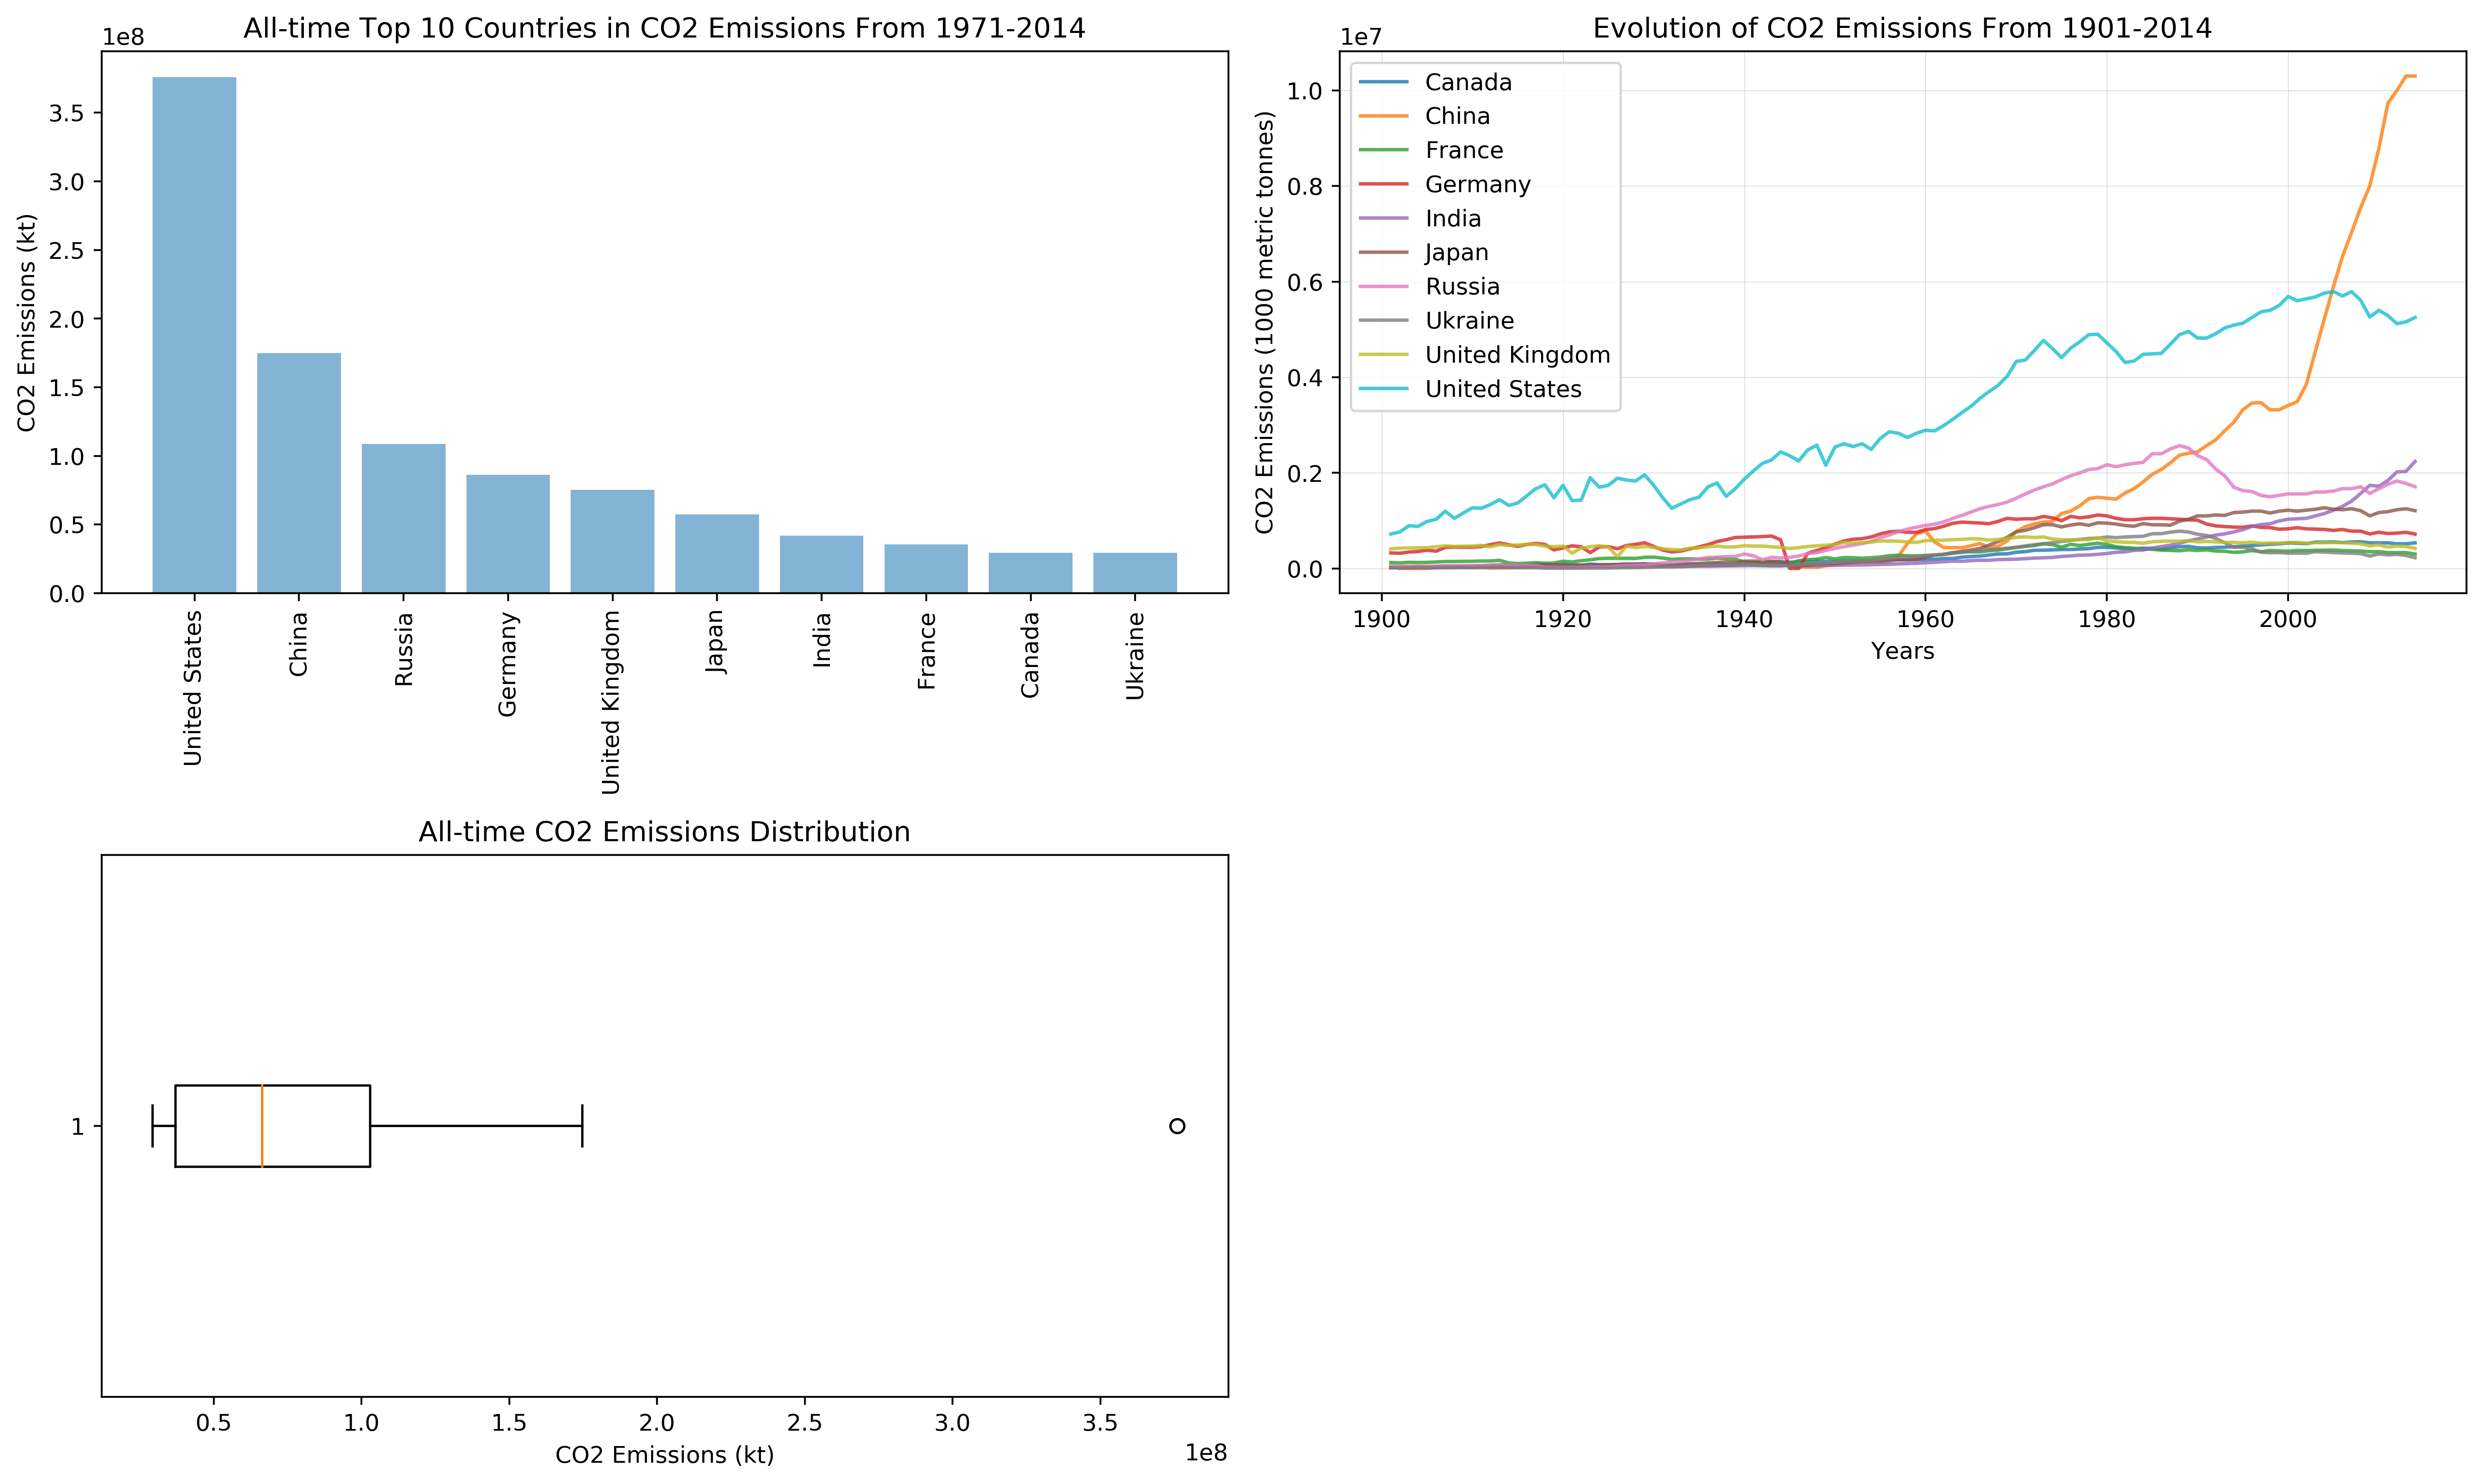

In [32]:
fig = plt.figure(figsize=(15,9), dpi=400)

# subplot of the all-time CO2 emissions
plt.subplot(2,2,1)
plt.title('All-time Top 10 Countries in CO2 Emissions From 1971-2014')

x = subsets['Yearly Co2 Emissions 1000 Tonnes'][2][:10].index
y = subsets['Yearly Co2 Emissions 1000 Tonnes'][2][:10].values
plt.ylabel('CO2 Emissions (kt)')

plt.bar(x, y, alpha=0.55)
plt.xticks(rotation='vertical')

# subplot of the evolution of CO2 emmissions in the world for the top 10 countries
plt.subplot(2,2,2)
plt.title('Evolution of CO2 Emissions From 1901-2014')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions (1000 metric tonnes)')

x = subsets['Yearly Co2 Emissions 1000 Tonnes'][3][150:].index.astype(int)
y = subsets['Yearly Co2 Emissions 1000 Tonnes'][3][150:].values
legend_labels = subsets['Yearly Co2 Emissions 1000 Tonnes'][3].columns

plt.xticks()

plt.plot(x, y, alpha=0.8)
plt.legend(legend_labels)
plt.grid(True, linewidth=0.15)

# subplot of a boxplot
plt.subplot(2,2,3)
plt.title('All-time CO2 Emissions Distribution')
plt.boxplot(subsets['Yearly Co2 Emissions 1000 Tonnes'][2][:10].values, 
            vert=False)
plt.xlabel('CO2 Emissions (kt)')

plt.tight_layout();

> __Conclusion__: As expected, the United States is the country that has emitted the highest amount of carbon dioxide into the atmosphere. China, however, has been increasingly emitting carbon dioxide since 1980 and mainly after the year 2000. Other than the United States, China and India (and maybe Russia), other countries seem to be emitting a more or less steady amount of carbon dioxide every year. As happened in the Oil Consumption and Production distributions, this CO2 emissions distribution shows a right skewed distribution, meaning that a few countries are really apart from the rest in relation to CO2 emissions.

### Question 5. What is the relationship between Oil Consumption and GDP (PPP)?

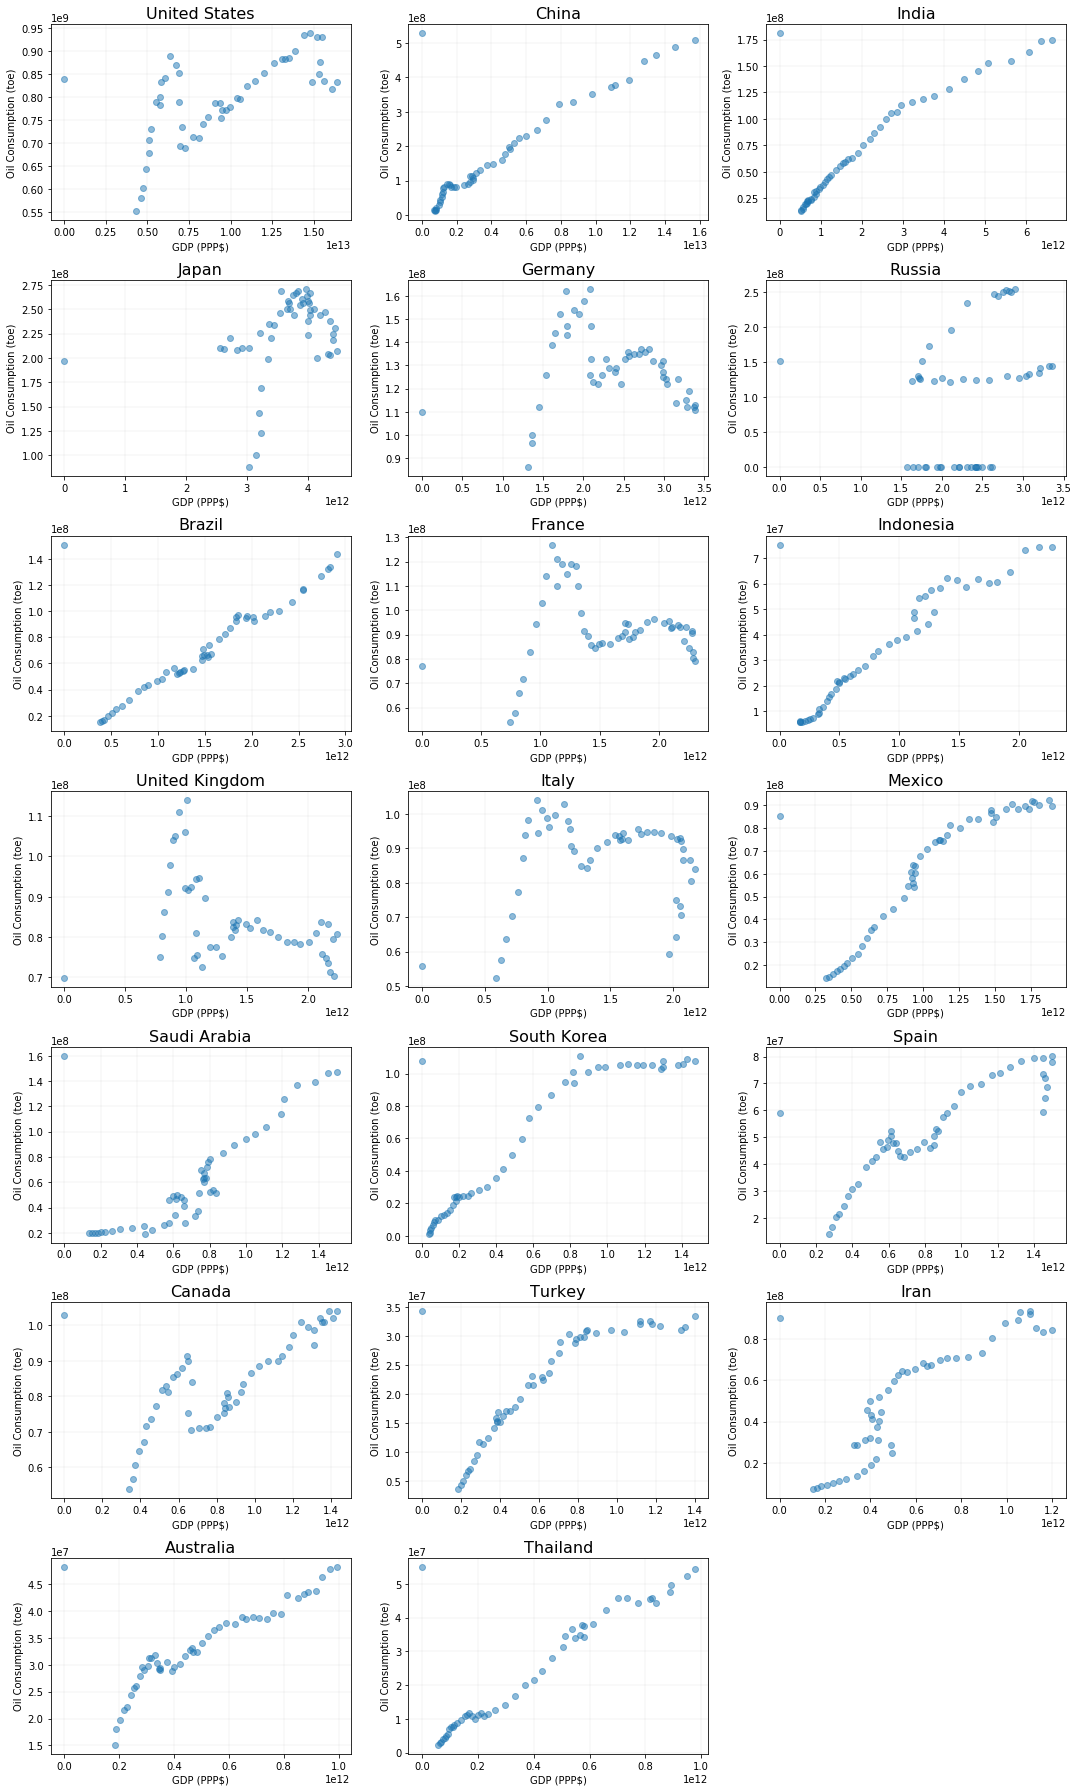

In [33]:
plt.figure(figsize=(15,25))

# array of the countries with the highest gdp in the last tracked year (2014)
highest_gdp = subsets['Gdp Ppp Inflation Adjusted'][1].T.iloc[-4].sort_values(ascending=False)[0:20].index.values

for i, country in enumerate(highest_gdp):
    
    plt.subplot(7,3,i+1)
    plt.scatter(subsets['Gdp Ppp Inflation Adjusted'][1].T.loc['1965':'2014',[country]], 
                        subsets['Oil Consumption'][1].T.loc['1965':'2014',[country]],
                        alpha=0.5)
    plt.title(country, fontsize=16)
    plt.grid(True, linewidth=0.15)
    plt.xlabel('GDP (PPP$)')
    plt.ylabel('Oil Consumption (toe)')

plt.tight_layout();

> __Conclusion__: In some of the countries, there seems to have a strong positive correlation between the Oil consumption and GDP. This is specially true for countries that had a late development -- as can be noted by the very first dot in the plot. It is impossible, however, to imply any causual link between the two variables with the available data.

<a id='conclusions'></a>
## Conclusions

Energy sources are, invariably, necessary factors for nations to sustain their activities as well as the wellbeing of their people and to economically grow. As shown above (__Question 1__), there is no indication that the world is demmanding less energy sources than it has done in the past, nor is there any indication of a possible turn in this upward trend.

Also as shown above (__Question 2__ and __3__), it did not come as a surprise that the countries that most consumed oil and other energy sources in history are the ones who historically explored natural resources of other countries. The produced oil of the poorer countries are most likely exported to the most consuming countries.

It came as a surprise that, despite the fact that China is, as of recent years, emitting higher amounts of carbon dioxide into the atmosphere than all other countries, the United States has historically emitted twice the historic amount of that of China (__Question 4__).

At last, it is unlikely that one could imply a casual link between the GDP (PPP) and Oil consumption. However, it was very interesting to observe how the two variables seem to have a strong positive correlation, mainly for historically poor countries -- late developing countries -- such as Brazil and India (__Question 5__).

#### Limitations of the data
As commented above, the missing values were the main limitation for this analysis, regarding data quality.
The data had a wide range of missing values for each analyzed variable. This limitation happens simply because the information was not documented or because it did not exist in the source website. Having values for every country in the world for every analyzed variable and for every year would have made possible a more accurate analysis. 